<a href="https://colab.research.google.com/github/kannankumar/jupyter-notebooks/blob/master/MNIST_GAN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.layers import Dense, Reshape, Flatten, Input
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Sequential
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
# Input dimensions

img_width = 28
img_height = 28
img_channel = 1

img_shape = (img_width, img_height, img_channel)
img_size = img_width * img_height * img_channel

z_dim = 100

In [0]:
# Generator

def build_generator(img_size=img_size, img_shape=img_shape, z_dim=z_dim):
  model = Sequential()
  
  model.add(Dense(128, input_dim=z_dim))
  model.add(LeakyReLU(alpha=0.1))
  
  model.add(Dense(img_size, activation='tanh'))
  
  model.add(Reshape(img_shape))  
  return model


In [0]:
# Discriminator

def build_discriminator(img_shape=img_shape):
  model = Sequential()

  model.add(Flatten(input_shape=img_shape))

  model.add(Dense(128))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(1, activation='sigmoid'))
  return model

In [0]:
# Complete GAN model

def build_gan(generator, discriminator):
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  return model

In [0]:
# Instantiate Discriminators and Generators and Compile them

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

generator = build_generator()
discriminator.trainable = False

gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
## Training Loop

iteration_checkpoints = []
losses= []
accuracy = []

def train(iterations, batch_size, sample_every):

  (x_train, _), (_,_) = mnist.load_data()
  x_train = x_train / 255                   # range 0 to 1
  x_train = x_train*2 - 1                   # change to range -1 to 1
  
  # change from (60000, 28, 28)  -> (60000, 28,28,1)
  x_train = np.expand_dims(x_train, axis=3) 
  
  real_labels = np.ones((batch_size, 1))
  fake_labels = np.zeros((batch_size, 1))

  for iteration in range(iterations):

    #**********************************#
    #       Train Discriminator        #
    #**********************************#

    # take a batch of real images
    idx = np.random.randint(0, x_train.shape[0], size=batch_size)
    x_real = x_train[idx]

    # take a batch of random noise vector
    z = np.random.randn(batch_size, z_dim)

    # generate a batch of fake images
    x_fake = generator.predict(z)

    # train discriminator on real images
    d_real_loss = discriminator.train_on_batch(x_real, real_labels)

    # train discriminator on fake images
    d_fake_loss = discriminator.train_on_batch(x_fake, fake_labels)

    # calculate total losses
    d_loss, accuracy = 0.5 * np.add(d_real_loss, d_fake_loss)  ## [HOW !!!!!!!?????]



    #**********************************#
    #         Train Generator          #
    #**********************************#
    
    # Take a batch of random noise vectors
    z = np.random.randn(batch_size, z_dim)

    # Generate a batch of fake images 
    x_fake = generator.predict(z)

    # train generator on fake images
    g_loss = gan.train_on_batch(z, real_labels)

    
    #**********************************#
    #       Iteration Metrics          #
    #**********************************#
    iteration_checkpoints.append(iteration+1)
    losses.append((d_loss, g_loss))
    
    #**********************************#
    #     Aggregated Step Metrics      #
    #**********************************#
    if (iteration+1) % sample_every == 0:
      print("%d [D Loss: %f] [G Loss: %f]" %(iteration+1, d_loss, g_loss))
      sample_digits(generator)


In [0]:
# Method to show sample images from generator

def sample_digits(generator, num_rows=4, num_cols=4):
  z = np.random.randn(num_rows * num_cols, z_dim)
  imgs = generator.predict(z)

  fig, ax = plt.subplots(num_rows, num_cols, figsize=(4,4), sharex=True, sharey=True)
  
  cnt = 0
  
  for r in range(num_rows):
    for c in range(num_cols):
      ax[r][c].imshow(imgs[cnt, :, :, 0], cmap='binary')
      cnt += 1

### Train Vanilla GAN

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1000 [D Loss: 0.214567] [G Loss: 2.994835]
2000 [D Loss: 0.107128] [G Loss: 5.131363]
3000 [D Loss: 0.185018] [G Loss: 3.869363]
4000 [D Loss: 0.223793] [G Loss: 4.135705]
5000 [D Loss: 0.578879] [G Loss: 2.458841]
6000 [D Loss: 0.549609] [G Loss: 2.794838]
7000 [D Loss: 0.566463] [G Loss: 2.187701]
8000 [D Loss: 0.725508] [G Loss: 2.101764]
9000 [D Loss: 0.500641] [G Loss: 2.267761]
10000 [D Loss: 0.627427] [G Loss: 2.360563]
11000 [D Loss: 0.649887] [G Loss: 1.686458]
12000 [D Loss: 0.621753] [G Loss: 1.553648]
13000 [D Loss: 0.544883] [G Loss: 1.526440]
14000 [D Loss: 0.516754] [G Loss: 1.947069]
15000 [D Loss: 0.410926] [G Loss: 1.750458]
16000 [D Loss: 0.566150] [G Loss: 1.639401]
17000 [D Loss: 0.448415] [G Loss: 1.740700]
18000 [D Loss: 0.440312] [G Loss: 2.025188]
19000 [D Loss: 0.466085] [G Loss: 1.875743]
20000 [D Loss: 0.478529] [G Loss: 1.867733]


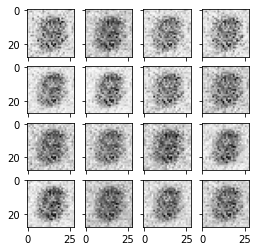

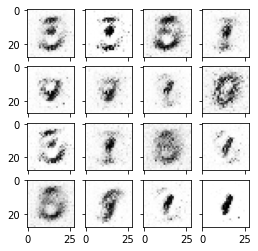

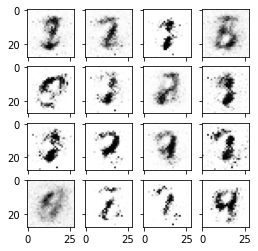

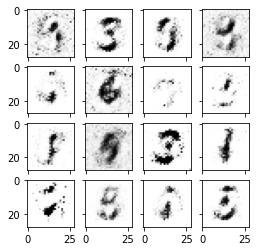

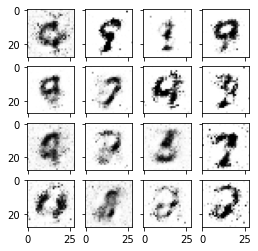

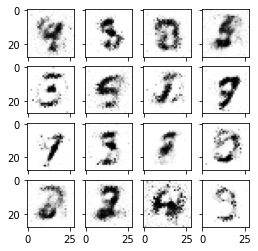

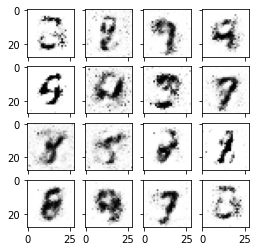

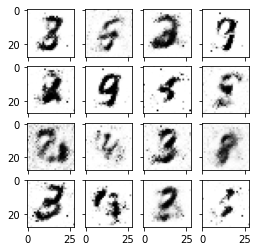

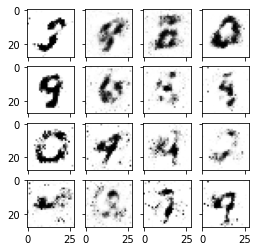

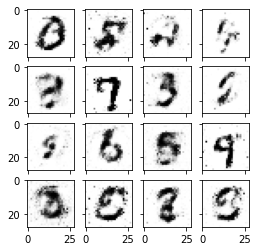

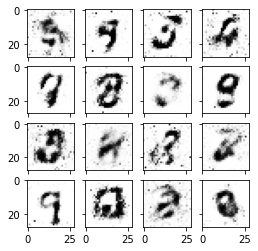

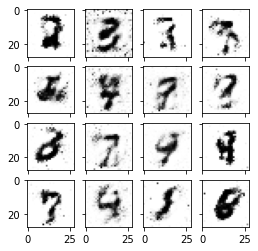

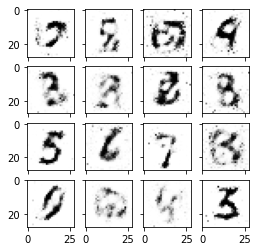

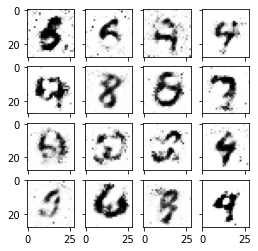

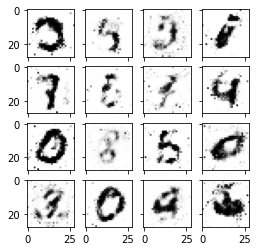

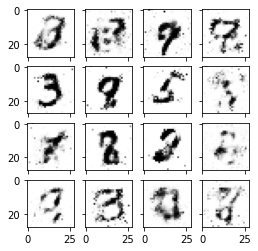

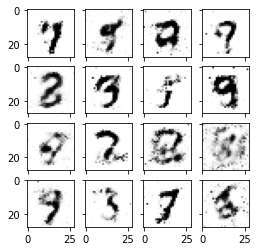

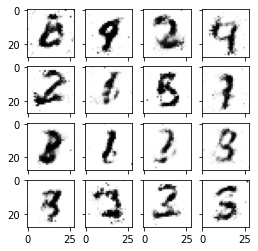

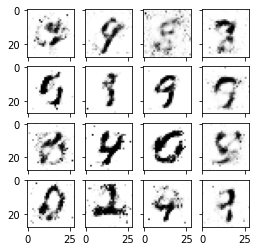

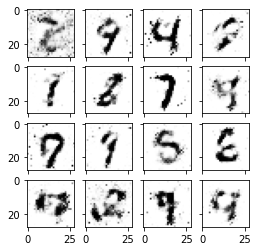

In [9]:
# Run training

iterations = 20000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval)

### Visualize Losses

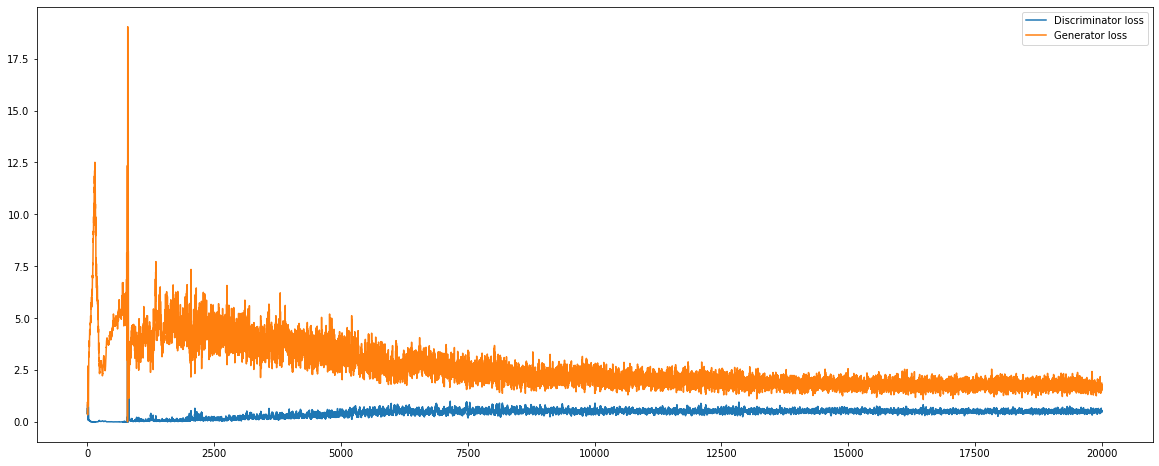

In [10]:
d_loss = [loss[0] for loss in losses]
g_loss = [loss[1] for loss in losses]

plt.figure(figsize=(20,8))
plt.plot(iteration_checkpoints, d_loss, label='Discriminator loss')
plt.plot(iteration_checkpoints, g_loss, label='Generator loss')
plt.legend()